In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# loading the data
data = pd.read_csv('day_data.csv')

In [ ]:
data.head()

,Unnamed: 0,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,month,year
0,0,spring,0,Monday,1,Mist + Cloudy,14.110847,80.5833,10.749882,331,654,985,January,2018
1,1,spring,0,Tuesday,1,Mist + Cloudy,14.902598,69.6087,16.652113,131,670,801,January,2018
2,2,spring,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,120,1229,1349,January,2018
3,3,spring,0,Thursday,1,Clear,8.200000,59.0435,10.739832,108,1454,1562,January,2018
4,4,spring,0,Friday,1,Clear,9.305237,43.6957,12.522300,82,1518,1600,January,2018


In [ ]:
data.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   weekday     730 non-null    object
 2   weathersit  730 non-null    object
 3   month       730 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB


In [ ]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(data[['season', 'weekday', 'weathersit', 'month']], drop_first=True)
dummy_data.head()

,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
data1=data.drop(['season', 'weekday', 'weathersit', 'month'],axis=1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   casual      730 non-null    int64  
 7   registered  730 non-null    int64  
 8   cnt         730 non-null    int64  
 9   year        730 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 57.2 KB


In [ ]:
data1=pd.concat([data1,dummy_data],axis=1)

In [ ]:
data1.shape

(730, 32)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   hum                       730 non-null    float64
 5   windspeed                 730 non-null    float64
 6   casual                    730 non-null    int64  
 7   registered                730 non-null    int64  
 8   cnt                       730 non-null    int64  
 9   year                      730 non-null    int64  
 10  season_spring             730 non-null    uint8  
 11  season_summer             730 non-null    uint8  
 12  season_winter             730 non-null    uint8  
 13  weekday_Monday            730 non-null    uint8  
 14  weekday_Sa

In [ ]:
# Import Standard scaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale the six numeric features present in the dataset
scaler = StandardScaler()
data1[['temp','hum','windspeed','casual','registered','cnt']] = scaler.fit_transform(data1[['temp','hum','windspeed','casual','registered','cnt']])
data1.head()

,Unnamed: 0,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,year,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0,0,1,-0.827613,1.252343,-0.387833,-0.755455,-1.927745,-1.820972,2018,...,0,0,1,0,0,0,0,0,0,0
1,1,0,1,-0.722069,0.480996,0.748899,-1.046996,-1.917480,-1.916078,2018,...,0,0,1,0,0,0,0,0,0,0
2,2,0,1,-1.635432,-1.338073,0.745931,-1.063031,-1.558846,-1.632827,2018,...,0,0,1,0,0,0,0,0,0,0
3,3,0,1,-1.615560,-0.261577,-0.389769,-1.080523,-1.414494,-1.522732,2018,...,0,0,1,0,0,0,0,0,0,0
4,4,0,1,-1.468226,-1.340294,-0.046477,-1.118424,-1.373434,-1.503090,2018,...,0,0,1,0,0,0,0,0,0,0


<Axes: >

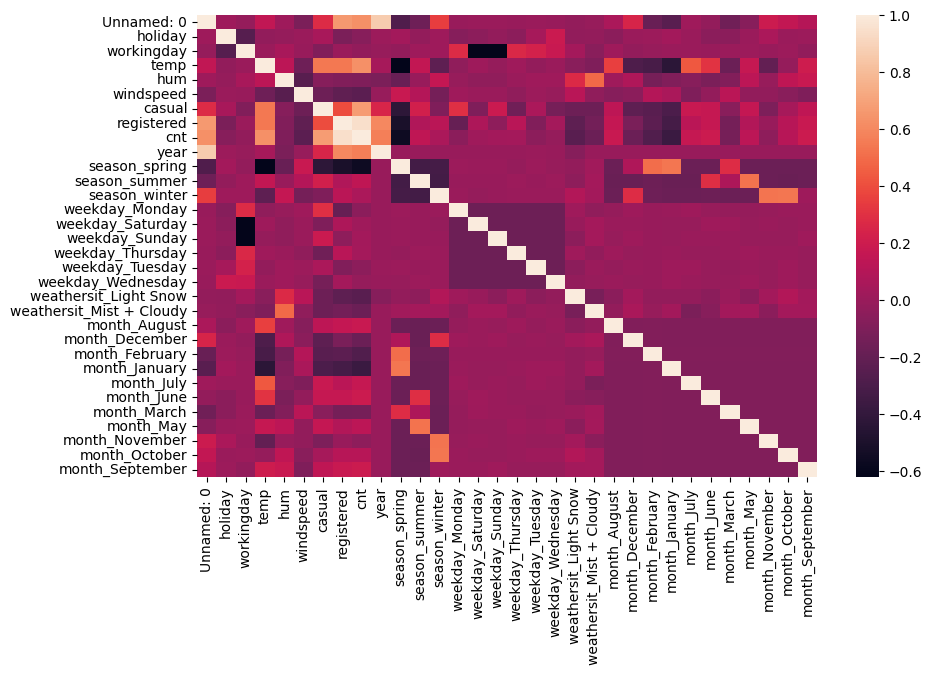

In [ ]:
#plot correlation
import seaborn as sns
corr=data1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr)

In [ ]:
# Import the required library
from sklearn.model_selection import train_test_split

In [ ]:
# Put all the feature variables in X
data1.drop(['Unnamed: 0'], axis=1, inplace=True)
x = data1.drop(['cnt'],axis=1)
x.head()

,holiday,workingday,temp,hum,windspeed,casual,registered,year,season_spring,season_summer,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0,1,-0.827613,1.252343,-0.387833,-0.755455,-1.927745,2018,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,-0.722069,0.480996,0.748899,-1.046996,-1.917480,2018,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,-1.635432,-1.338073,0.745931,-1.063031,-1.558846,2018,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,-1.615560,-0.261577,-0.389769,-1.080523,-1.414494,2018,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,-1.468226,-1.340294,-0.046477,-1.118424,-1.373434,2018,1,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Put the target variable in y
y = data1['cnt']
y.head()

0   -1.820972
1   -1.916078
2   -1.632827
3   -1.522732
4   -1.503090
Name: cnt, dtype: float64

In [ ]:
# Split the dataset into 70% train and 30% test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3,random_state=100)

In [ ]:
#RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth = 2, n_estimators=100, max_leaf_nodes = 5, random_state = 22, oob_score=True)  # adjust parameters
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, max_leaf_nodes=5, oob_score=True,
                      random_state=22)

In [ ]:
#prediction and evaluation
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
y_pred = rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
oob_score = rf_model.oob_score_
print("mse:", mse)
print("rmse:", rmse)
print("r2:", r2)
print("Out-of-Bag Score:", oob_score)

mse: 0.12924362396896558
rmse: 0.3595046925548616
r2: 0.865185995284609
Out-of-Bag Score: 0.8839230280893849


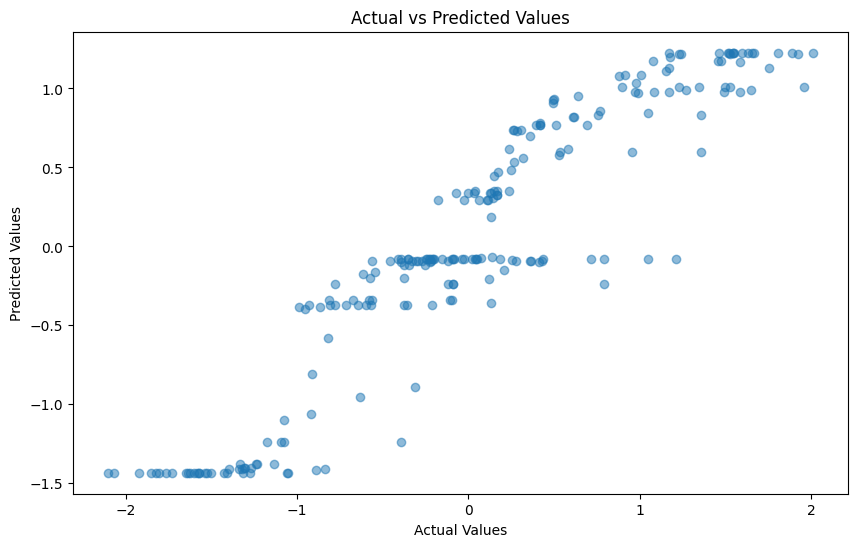

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

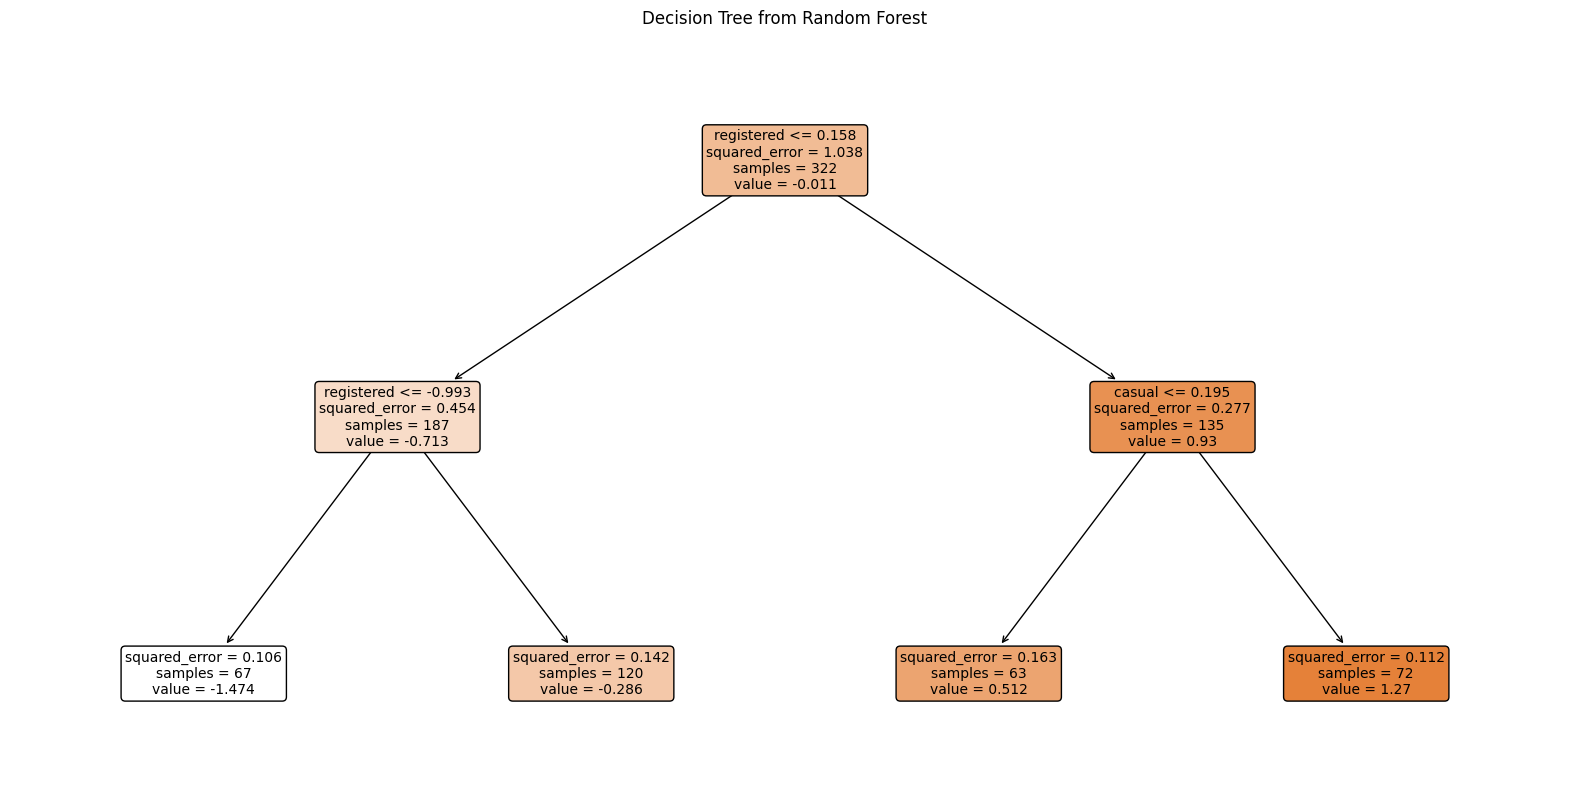

In [ ]:
from sklearn.tree import plot_tree
tree_to_plot = rf_model.estimators_[0]
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=data1.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()